# Final Project

By : Group 2

Person in Charge: Maheswara S.

Batch : HCK-001

## Import Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl
from scipy import stats

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

from feature_engine.outliers import Winsorizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Loading

In [67]:
df_events = pd.read_csv("dsv1069_events.csv")
df_items = pd.read_csv("dsv1069_items.csv")
df_orders = pd.read_csv("dsv1069_orders.csv")
df_users = pd.read_csv("dsv1069_users.csv")

C:\Users\mahes\AppData\Local\Temp\ipykernel_7552\2536878048.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_events = pd.read_csv("dsv1069_events.csv")


In [68]:
df_events.head()

,event_id,event_time,user_id,event_name,platform,parameter_name,parameter_value
0,b9de71c5c3cc4cd7a97e50b832106e5a,2017-06-26 11:23:39,178481.0,view_item,android,item_id,3526
1,23267713c9ea44419331731f50b6a8db,2017-06-27 10:46:39,178481.0,view_item,android,item_id,1514
2,1b7822fa7b854e01970218ae8f721fe0,2017-06-27 11:15:39,178481.0,view_item,android,item_id,3712
3,2a7a188a626841ac94befcc419f06af4,2016-10-05 20:43:10,154133.0,view_item,android,item_id,3586
4,631d657264cc4616a4528f759509b25d,2016-10-04 03:29:10,154133.0,view_item,android,item_id,1061


events table will not be used for RFM analysis

In [69]:
df_items.head()

,adjective,category,created_at,id,modifier,name,price
0,fuzzy,contraption,2014-01-15 21:36:09,2512.0,carrying_case,fuzzy contraption carrying_case,150.0
1,NaN,instrument,2013-05-14 05:20:50,482.0,refill,instrument refill,35.2
2,industrial-strength,module,2014-02-04 19:28:32,2446.0,NaN,industrial-strength module,300.0
3,digital,tool,2013-02-25 12:23:18,1312.0,carrying_case,digital tool carrying_case,16.5
4,miniature,device,2013-08-05 17:20:45,3556.0,cleaner,miniature device cleaner,16.5


items table will not be used for RFM analysis

In [70]:
df_orders.head()

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at
0,192320.0,83118.0,178481.0,3526.0,digital apparatus,apparatus,330.0,2017-06-28 21:14:25,2017-06-27 21:19:39
1,192320.0,207309.0,178481.0,1514.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
2,192320.0,392027.0,178481.0,3712.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
3,80902.0,243831.0,154133.0,3586.0,reflective instrument,instrument,57.2,2016-10-09 06:57:30,2016-10-07 10:08:10
4,80902.0,399806.0,154133.0,1061.0,extra-strength instrument charger,instrument,17.6,2016-10-09 06:57:30,2016-10-07 10:08:10


* invoice_id can be used to find total order, 
* user_id for unique id,
* item_id can be used to find total item bought, 
* price for monetary value 
* paid_at for latest transaction

In [71]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47402 entries, 0 to 47401
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_id     47402 non-null  float64
 1   line_item_id   47402 non-null  float64
 2   user_id        47402 non-null  float64
 3   item_id        47402 non-null  float64
 4   item_name      47402 non-null  object 
 5   item_category  47402 non-null  object 
 6   price          47402 non-null  float64
 7   created_at     47402 non-null  object 
 8   paid_at        47402 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.3+ MB


created_at and paid_at are still object, will be converted to datetime later

In [72]:
df_users.head()

,created_at,deleted_at,email_address,first_name,id,last_name,merged_at,parent_user_id
0,2014-12-20 07:07:45,NaN,ArataHopper@earthlink.info,Arata,51590.0,Hopper,NaN,NaN
1,2016-10-14 05:39:20,NaN,Riya_Gruber1974@mail.net,Riya,158891.0,Gruber,NaN,NaN
2,2017-01-21 10:20:09,NaN,Peter_Sousa@yahoo.info,Peter,179949.0,Sousa,NaN,NaN
3,2015-10-30 21:31:30,NaN,D_Kowalski1962@gmail.com,D,98000.0,Kowalski,NaN,NaN
4,2015-10-24 16:27:27,NaN,SNovak1966@mail.com,S,93994.0,Novak,NaN,NaN


* created_at can be used to find when was the id created

In [73]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117178 entries, 0 to 117177
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   created_at      117178 non-null  object 
 1   deleted_at      2888 non-null    object 
 2   email_address   117178 non-null  object 
 3   first_name      117178 non-null  object 
 4   id              117178 non-null  float64
 5   last_name       117178 non-null  object 
 6   merged_at       6408 non-null    object 
 7   parent_user_id  6408 non-null    float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


created at will be converted to datetime

## RFM Analysis

In this RFM analysis we will be doing the following:
* Recency: calculate the length in terms of days, between latest date and last purchase of a customer
* Frequency: calculate the amount of invoice for each customer
* Monetary: calculate the total amount of money spent from a customer
* Length: calculate the total days between the creation of the ID and the latest order of the ID

### Merge Orders and Users

In [74]:
new_df = df_orders.merge(df_users,how='inner',left_on="user_id",right_on='id',suffixes=('_orders', '_users'))
new_df

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at_orders,paid_at,created_at_users,deleted_at,email_address,first_name,id,last_name,merged_at,parent_user_id
0,192320.0,83118.0,178481.0,3526.0,digital apparatus,apparatus,330.000,2017-06-28 21:14:25,2017-06-27 21:19:39,2017-01-02 04:17:55,NaN,ADavis1973@gmail.edu,A,178481.0,Davis,NaN,NaN
1,192320.0,207309.0,178481.0,1514.0,miniature apparatus cleaner,apparatus,99.000,2017-06-28 21:14:25,2017-06-27 21:19:39,2017-01-02 04:17:55,NaN,ADavis1973@gmail.edu,A,178481.0,Davis,NaN,NaN
2,192320.0,392027.0,178481.0,3712.0,miniature apparatus cleaner,apparatus,99.000,2017-06-28 21:14:25,2017-06-27 21:19:39,2017-01-02 04:17:55,NaN,ADavis1973@gmail.edu,A,178481.0,Davis,NaN,NaN
3,80902.0,243831.0,154133.0,3586.0,reflective instrument,instrument,57.200,2016-10-09 06:57:30,2016-10-07 10:08:10,2016-09-09 05:30:45,NaN,Anne_Davis1985@mail.edu,Anne,154133.0,Davis,NaN,NaN
4,80902.0,399806.0,154133.0,1061.0,extra-strength instrument charger,instrument,17.600,2016-10-09 06:57:30,2016-10-07 10:08:10,2016-09-09 05:30:45,NaN,Anne_Davis1985@mail.edu,Anne,154133.0,Davis,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47397,92108.0,236314.0,230808.0,1677.0,rechargable widget,widget,3.900,2017-12-04 19:01:55,2017-12-05 03:00:14,2017-09-13 08:59:57,NaN,LisaRodriquez@outlook.edu,Lisa,230808.0,Rodriquez,NaN,NaN
47398,348144.0,162528.0,151538.0,3729.0,prize-winning gadget wrapper,gadget,39.160,2016-11-18 21:00:07,2016-11-18 14:19:52,2016-09-01 22:55:04,NaN,Lisa_Santos@yahoo.net,Lisa,151538.0,Santos,NaN,NaN
47399,348144.0,321219.0,151538.0,1645.0,digital gadget carrying_case,gadget,58.740,2016-11-18 21:00:07,2016-11-18 14:19:52,2016-09-01 22:55:04,NaN,Lisa_Santos@yahoo.net,Lisa,151538.0,Santos,NaN,NaN
47400,348144.0,264112.0,151538.0,2084.0,matte gadget storage_unit,gadget,278.125,2016-11-18 21:00:07,2016-11-18 14:19:52,2016-09-01 22:55:04,NaN,Lisa_Santos@yahoo.net,Lisa,151538.0,Santos,NaN,NaN


### Drop Unused Columns

In [75]:
new_df.drop(['deleted_at','email_address','first_name','last_name','merged_at','parent_user_id','id','item_name','item_category','line_item_id','created_at_orders'],axis=1,inplace=True)
new_df

,invoice_id,user_id,item_id,price,paid_at,created_at_users
0,192320.0,178481.0,3526.0,330.000,2017-06-27 21:19:39,2017-01-02 04:17:55
1,192320.0,178481.0,1514.0,99.000,2017-06-27 21:19:39,2017-01-02 04:17:55
2,192320.0,178481.0,3712.0,99.000,2017-06-27 21:19:39,2017-01-02 04:17:55
3,80902.0,154133.0,3586.0,57.200,2016-10-07 10:08:10,2016-09-09 05:30:45
4,80902.0,154133.0,1061.0,17.600,2016-10-07 10:08:10,2016-09-09 05:30:45
...,...,...,...,...,...,...
47397,92108.0,230808.0,1677.0,3.900,2017-12-05 03:00:14,2017-09-13 08:59:57
47398,348144.0,151538.0,3729.0,39.160,2016-11-18 14:19:52,2016-09-01 22:55:04
47399,348144.0,151538.0,1645.0,58.740,2016-11-18 14:19:52,2016-09-01 22:55:04
47400,348144.0,151538.0,2084.0,278.125,2016-11-18 14:19:52,2016-09-01 22:55:04


### To Datetime

In [76]:
new_df['paid_at'] = pd.to_datetime(new_df['paid_at'])
new_df['created_at_users'] = pd.to_datetime(new_df['created_at_users'])

In [77]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47402 entries, 0 to 47401
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   invoice_id        47402 non-null  float64       
 1   user_id           47402 non-null  float64       
 2   item_id           47402 non-null  float64       
 3   price             47402 non-null  float64       
 4   paid_at           47402 non-null  datetime64[ns]
 5   created_at_users  47402 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.5 MB


### Group By Invoice ID

In [78]:
df_agg = new_df.groupby('invoice_id',
            as_index=False).agg(user_id=('user_id',np.max),
                                total_price=('price',np.sum),
                                paid_at=('paid_at',np.max),
                                created_at=('created_at_users',np.min)
                                )
df_agg

,invoice_id,user_id,total_price,paid_at,created_at
0,6.0,89601.0,143.00,2016-03-13 18:38:19,2015-09-14 14:21:56
1,20.0,50878.0,177.22,2015-03-25 03:11:09,2014-12-29 08:52:28
2,30.0,69737.0,0.00,2015-11-08 15:07:15,2015-05-06 04:36:50
3,64.0,139762.0,15.75,2016-12-30 03:33:16,2016-06-20 14:16:04
4,98.0,11072.0,178.64,2014-05-02 03:58:15,2013-11-14 14:23:26
...,...,...,...,...,...
18966,399938.0,252227.0,300.00,2018-03-13 11:46:58,2017-11-26 22:36:14
18967,399943.0,201699.0,1080.00,2017-05-19 01:51:42,2017-04-23 13:31:26
18968,399960.0,86432.0,105.60,2016-01-30 16:14:37,2015-08-25 04:06:27
18969,399979.0,198052.0,32.04,2017-08-24 11:23:24,2017-04-23 08:00:06


In [79]:
total_item = new_df.groupby(['invoice_id'],as_index=False)['item_id'].count()
total_item.rename(columns={'item_id':'total_items'},inplace=True)
total_item.sort_values(by='total_items',ascending=True)

,invoice_id,total_items
0,6.0,1
8807,185759.0,1
8806,185747.0,1
8804,185713.0,1
8800,185642.0,1
...,...,...
3259,69305.0,4
3258,69297.0,4
13603,286959.0,4
13600,286912.0,4


In [80]:
by_invoice = df_agg.merge(total_item,how='inner',left_on='invoice_id',right_on='invoice_id')
by_invoice

,invoice_id,user_id,total_price,paid_at,created_at,total_items
0,6.0,89601.0,143.00,2016-03-13 18:38:19,2015-09-14 14:21:56,1
1,20.0,50878.0,177.22,2015-03-25 03:11:09,2014-12-29 08:52:28,3
2,30.0,69737.0,0.00,2015-11-08 15:07:15,2015-05-06 04:36:50,1
3,64.0,139762.0,15.75,2016-12-30 03:33:16,2016-06-20 14:16:04,2
4,98.0,11072.0,178.64,2014-05-02 03:58:15,2013-11-14 14:23:26,4
...,...,...,...,...,...,...
18966,399938.0,252227.0,300.00,2018-03-13 11:46:58,2017-11-26 22:36:14,1
18967,399943.0,201699.0,1080.00,2017-05-19 01:51:42,2017-04-23 13:31:26,3
18968,399960.0,86432.0,105.60,2016-01-30 16:14:37,2015-08-25 04:06:27,3
18969,399979.0,198052.0,32.04,2017-08-24 11:23:24,2017-04-23 08:00:06,1


### Group By User ID (Frequency and Monetary)

In [81]:
by_id = by_invoice.groupby('user_id',as_index=False).agg(
                                Monetary=('total_price',np.sum),
                                last_order=('paid_at',np.max),
                                created_at=('created_at',np.min),
                                Amount=('total_items',np.sum)
                                )
by_id

,user_id,Monetary,last_order,created_at,Amount
0,17.0,243.00,2013-05-25 08:27:17,2013-03-03 02:42:42,3
1,25.0,1.80,2013-05-17 03:11:48,2013-03-06 16:01:06,2
2,63.0,585.00,2013-07-07 11:26:45,2013-03-12 16:34:26,3
3,65.0,44.50,2013-05-09 10:22:58,2013-03-08 01:55:17,1
4,69.0,9.42,2013-08-09 23:25:51,2013-02-25 01:26:18,4
...,...,...,...,...,...
17458,295368.0,45.00,2018-06-01 09:27:57,2018-05-16 20:53:54,1
17459,296332.0,4.65,2018-05-29 22:55:55,2018-05-19 14:15:06,2
17460,296584.0,8.82,2018-06-02 15:15:39,2018-05-17 21:27:18,4
17461,296887.0,144.00,2018-05-29 15:02:38,2018-05-20 06:09:25,4


In [82]:
frequency = by_invoice.groupby('user_id',as_index=False)['invoice_id'].count()
frequency.rename(columns={'invoice_id':'Frequency'},inplace=True)
frequency.sort_values(by='Frequency', ascending=True)

,user_id,Frequency
0,17.0,1
11403,176297.0,1
11404,176323.0,1
11405,176325.0,1
11406,176373.0,1
...,...,...
12290,191026.0,4
15058,234728.0,4
11763,182241.0,4
5717,88724.0,4


In [83]:
df_frequency = by_id.merge(frequency,how='inner',left_on='user_id',right_on='user_id')
df_frequency

,user_id,Monetary,last_order,created_at,Amount,Frequency
0,17.0,243.00,2013-05-25 08:27:17,2013-03-03 02:42:42,3,1
1,25.0,1.80,2013-05-17 03:11:48,2013-03-06 16:01:06,2,1
2,63.0,585.00,2013-07-07 11:26:45,2013-03-12 16:34:26,3,1
3,65.0,44.50,2013-05-09 10:22:58,2013-03-08 01:55:17,1,1
4,69.0,9.42,2013-08-09 23:25:51,2013-02-25 01:26:18,4,1
...,...,...,...,...,...,...
17458,295368.0,45.00,2018-06-01 09:27:57,2018-05-16 20:53:54,1,1
17459,296332.0,4.65,2018-05-29 22:55:55,2018-05-19 14:15:06,2,1
17460,296584.0,8.82,2018-06-02 15:15:39,2018-05-17 21:27:18,4,1
17461,296887.0,144.00,2018-05-29 15:02:38,2018-05-20 06:09:25,4,1


### Recency

In [84]:
# remove timestamp
df_frequency['last_order'] = df_frequency['last_order'].dt.date
df_frequency['created_at'] = df_frequency['created_at'].dt.date

In [85]:
df_frequency

,user_id,Monetary,last_order,created_at,Amount,Frequency
0,17.0,243.00,2013-05-25,2013-03-03,3,1
1,25.0,1.80,2013-05-17,2013-03-06,2,1
2,63.0,585.00,2013-07-07,2013-03-12,3,1
3,65.0,44.50,2013-05-09,2013-03-08,1,1
4,69.0,9.42,2013-08-09,2013-02-25,4,1
...,...,...,...,...,...,...
17458,295368.0,45.00,2018-06-01,2018-05-16,1,1
17459,296332.0,4.65,2018-05-29,2018-05-19,2,1
17460,296584.0,8.82,2018-06-02,2018-05-17,4,1
17461,296887.0,144.00,2018-05-29,2018-05-20,4,1


In [86]:
# calculating latest purchase
MyList = []
for i in range(len(df_frequency)):
    recent = df_frequency['last_order'].max() - df_frequency['last_order'][i]
    MyList.append(recent)

In [87]:
recency = pd.DataFrame(MyList,columns=["Recency"])
recency

,Recency
0,1836 days
1,1844 days
2,1793 days
3,1852 days
4,1760 days
...,...
17458,3 days
17459,6 days
17460,2 days
17461,6 days


In [88]:
df_recency = pd.concat([df_frequency,recency],axis=1)
df_recency

,user_id,Monetary,last_order,created_at,Amount,Frequency,Recency
0,17.0,243.00,2013-05-25,2013-03-03,3,1,1836 days
1,25.0,1.80,2013-05-17,2013-03-06,2,1,1844 days
2,63.0,585.00,2013-07-07,2013-03-12,3,1,1793 days
3,65.0,44.50,2013-05-09,2013-03-08,1,1,1852 days
4,69.0,9.42,2013-08-09,2013-02-25,4,1,1760 days
...,...,...,...,...,...,...,...
17458,295368.0,45.00,2018-06-01,2018-05-16,1,1,3 days
17459,296332.0,4.65,2018-05-29,2018-05-19,2,1,6 days
17460,296584.0,8.82,2018-06-02,2018-05-17,4,1,2 days
17461,296887.0,144.00,2018-05-29,2018-05-20,4,1,6 days


### Length

In [89]:
# calculating total days as customer
MyList2 = []
for i in range(len(df_recency)):
    days = df_recency['last_order'][i] - df_recency['created_at'][i]
    MyList2.append(days)

In [90]:
length = pd.DataFrame(MyList2,columns=["Length"])
length

,Length
0,83 days
1,72 days
2,117 days
3,62 days
4,165 days
...,...
17458,16 days
17459,10 days
17460,16 days
17461,9 days


In [91]:
df_length = pd.concat([df_recency,length],axis=1)
df_length

,user_id,Monetary,last_order,created_at,Amount,Frequency,Recency,Length
0,17.0,243.00,2013-05-25,2013-03-03,3,1,1836 days,83 days
1,25.0,1.80,2013-05-17,2013-03-06,2,1,1844 days,72 days
2,63.0,585.00,2013-07-07,2013-03-12,3,1,1793 days,117 days
3,65.0,44.50,2013-05-09,2013-03-08,1,1,1852 days,62 days
4,69.0,9.42,2013-08-09,2013-02-25,4,1,1760 days,165 days
...,...,...,...,...,...,...,...,...
17458,295368.0,45.00,2018-06-01,2018-05-16,1,1,3 days,16 days
17459,296332.0,4.65,2018-05-29,2018-05-19,2,1,6 days,10 days
17460,296584.0,8.82,2018-06-02,2018-05-17,4,1,2 days,16 days
17461,296887.0,144.00,2018-05-29,2018-05-20,4,1,6 days,9 days


In [92]:
df_RFM = df_length[['user_id','Recency','Frequency','Monetary','Length']]
df_RFM

,user_id,Recency,Frequency,Monetary,Length
0,17.0,1836 days,1,243.00,83 days
1,25.0,1844 days,1,1.80,72 days
2,63.0,1793 days,1,585.00,117 days
3,65.0,1852 days,1,44.50,62 days
4,69.0,1760 days,1,9.42,165 days
...,...,...,...,...,...
17458,295368.0,3 days,1,45.00,16 days
17459,296332.0,6 days,1,4.65,10 days
17460,296584.0,2 days,1,8.82,16 days
17461,296887.0,6 days,1,144.00,9 days


In [93]:
df_RFM.isna().sum()

user_id      0
Recency      0
Frequency    0
Monetary     0
Length       0
dtype: int64

### RFM EDA

In [94]:
df_RFM['Frequency'].value_counts()

1    16042
2     1339
3       77
4        5
Name: Frequency, dtype: int64

In [95]:
df_RFM[['Recency','Frequency','Monetary','Length']].describe()

,Recency,Frequency,Monetary,Length
count,17463,17463.000000,17463.000000,17463
mean,688 days 19:58:23.521731656,1.086354,276.381676,100 days 14:15:11.595945714
std,462 days 06:41:08.242346496,0.299063,383.592673,58 days 05:54:31.621686840
min,0 days 00:00:00,1.000000,0.000000,-3 days +00:00:00
25%,293 days 00:00:00,1.000000,43.200000,50 days 00:00:00
50%,629 days 00:00:00,1.000000,126.000000,100 days 00:00:00
75%,1035 days 00:00:00,1.000000,338.280000,151 days 00:00:00
max,1908 days 00:00:00,4.000000,4027.500000,205 days 00:00:00


We will be doing manual scoring/ranking of the RFML by using quantiles. Lower scores is better, while higher score is of lower performance/rank

In [96]:
RFM_segment = df_RFM.copy()

In [97]:
recency_score = []
for i in range(len(df_RFM)):
    if df_RFM['Recency'][i] <= df_RFM['Recency'].quantile(0.25):
        recency_score.append(1)
    elif df_RFM['Recency'][i] <= df_RFM['Recency'].quantile(0.5):
        recency_score.append(2)
    elif df_RFM['Recency'][i] <= df_RFM['Recency'].quantile(0.75):
        recency_score.append(3)
    else:
        recency_score.append(4)

recency_score = pd.DataFrame(recency_score,columns=["R_score"])
recency_score

,R_score
0,4
1,4
2,4
3,4
4,4
...,...
17458,1
17459,1
17460,1
17461,1


In [98]:
frequency_score = []
for i in range(len(df_RFM)):
    if df_RFM['Frequency'][i] <= df_RFM['Frequency'].quantile(0.25):
        frequency_score.append(4)
    elif df_RFM['Frequency'][i] <= df_RFM['Frequency'].quantile(0.5):
        frequency_score.append(3)
    elif df_RFM['Frequency'][i] <= df_RFM['Frequency'].quantile(0.75):
        frequency_score.append(2)
    else:
        frequency_score.append(1)

frequency_score = pd.DataFrame(frequency_score,columns=["F_score"])
frequency_score

,F_score
0,4
1,4
2,4
3,4
4,4
...,...
17458,4
17459,4
17460,4
17461,4


In [99]:
monetary_score = []
for i in range(len(df_RFM)):
    if df_RFM['Monetary'][i] <= df_RFM['Monetary'].quantile(0.25):
        monetary_score.append(4)
    elif df_RFM['Monetary'][i] <= df_RFM['Monetary'].quantile(0.5):
        monetary_score.append(3)
    elif df_RFM['Monetary'][i] <= df_RFM['Monetary'].quantile(0.75):
        monetary_score.append(2)
    else:
        monetary_score.append(1)

monetary_score = pd.DataFrame(monetary_score,columns=["M_score"])
monetary_score

,M_score
0,2
1,4
2,1
3,3
4,4
...,...
17458,3
17459,4
17460,4
17461,2


In [100]:
length_score = []
for i in range(len(df_RFM)):
    if df_RFM['Length'][i] <= df_RFM['Length'].quantile(0.25):
        length_score.append(4)
    elif df_RFM['Length'][i] <= df_RFM['Length'].quantile(0.5):
        length_score.append(3)
    elif df_RFM['Length'][i] <= df_RFM['Length'].quantile(0.75):
        length_score.append(2)
    else:
        length_score.append(1)

length_score = pd.DataFrame(length_score,columns=["L_score"])
length_score

,L_score
0,3
1,3
2,2
3,3
4,1
...,...
17458,4
17459,4
17460,4
17461,4


In [101]:
segments = []
for i in range(len(df_RFM)):
    n = str(recency_score['R_score'][i]) + str(frequency_score['F_score'][i]) + str(monetary_score['M_score'][i]) + str(length_score['L_score'][i])
    segments.append(n)

segments = pd.DataFrame(segments,columns=["RFM_segment"])
segments

,RFM_segment
0,4423
1,4443
2,4412
3,4433
4,4441
...,...
17458,1434
17459,1444
17460,1444
17461,1424


In [102]:
scores = []
for i in range(len(df_RFM)):
    n = recency_score['R_score'][i] + frequency_score['F_score'][i] + monetary_score['M_score'][i] + length_score['L_score'][i]
    scores.append(n)

scores = pd.DataFrame(scores,columns=["RFM_score"])
scores

,RFM_score
0,13
1,15
2,11
3,14
4,13
...,...
17458,12
17459,13
17460,13
17461,11


In [103]:
RFM_segment = pd.concat([df_RFM,recency_score,frequency_score,monetary_score,length_score,segments,scores],axis=1)
RFM_segment

,user_id,Recency,Frequency,Monetary,Length,R_score,F_score,M_score,L_score,RFM_segment,RFM_score
0,17.0,1836 days,1,243.00,83 days,4,4,2,3,4423,13
1,25.0,1844 days,1,1.80,72 days,4,4,4,3,4443,15
2,63.0,1793 days,1,585.00,117 days,4,4,1,2,4412,11
3,65.0,1852 days,1,44.50,62 days,4,4,3,3,4433,14
4,69.0,1760 days,1,9.42,165 days,4,4,4,1,4441,13
...,...,...,...,...,...,...,...,...,...,...,...
17458,295368.0,3 days,1,45.00,16 days,1,4,3,4,1434,12
17459,296332.0,6 days,1,4.65,10 days,1,4,4,4,1444,13
17460,296584.0,2 days,1,8.82,16 days,1,4,4,4,1444,13
17461,296887.0,6 days,1,144.00,9 days,1,4,2,4,1424,11


In [104]:
RFM_segment.describe()

,user_id,Recency,Frequency,Monetary,Length,R_score,F_score,M_score,L_score,RFM_score
count,17463.000000,17463,17463.000000,17463.000000,17463,17463.000000,17463.000000,17463.000000,17463.000000,17463.000000
mean,135718.863712,688 days 19:58:23.521731656,1.086354,276.381676,100 days 14:15:11.595945714,2.498597,3.755884,2.500601,2.506156,11.261238
std,79185.618598,462 days 06:41:08.242346496,0.299063,383.592673,58 days 05:54:31.621686840,1.118091,0.820240,1.118245,1.118996,2.302541
min,17.000000,0 days 00:00:00,1.000000,0.000000,-3 days +00:00:00,1.000000,1.000000,1.000000,1.000000,4.000000
25%,67112.000000,293 days 00:00:00,1.000000,43.200000,50 days 00:00:00,1.000000,4.000000,1.500000,2.000000,10.000000
50%,134184.000000,629 days 00:00:00,1.000000,126.000000,100 days 00:00:00,2.000000,4.000000,3.000000,3.000000,11.000000
75%,203160.000000,1035 days 00:00:00,1.000000,338.280000,151 days 00:00:00,3.000000,4.000000,4.000000,4.000000,13.000000
max,296956.000000,1908 days 00:00:00,4.000000,4027.500000,205 days 00:00:00,4.000000,4.000000,4.000000,4.000000,16.000000


In [105]:
RFM_segment['R_score'].value_counts()

1    4373
2    4369
3    4362
4    4359
Name: R_score, dtype: int64

In [106]:
RFM_segment['F_score'].value_counts()

4    16042
1     1421
Name: F_score, dtype: int64

In [107]:
RFM_segment['M_score'].value_counts()

3    4370
4    4369
1    4366
2    4358
Name: M_score, dtype: int64

In [108]:
RFM_segment['L_score'].value_counts()

4    4421
2    4387
1    4329
3    4326
Name: L_score, dtype: int64

In [109]:
RFM_segment['RFM_segment'].nunique()

126

as we can see that there are 126 segment, categorizing the segment manually would take a lot of time and effort. Thus we will be using unsupervised machine learning to cluster the users.

In [110]:
df_RFM

,user_id,Recency,Frequency,Monetary,Length
0,17.0,1836 days,1,243.00,83 days
1,25.0,1844 days,1,1.80,72 days
2,63.0,1793 days,1,585.00,117 days
3,65.0,1852 days,1,44.50,62 days
4,69.0,1760 days,1,9.42,165 days
...,...,...,...,...,...
17458,295368.0,3 days,1,45.00,16 days
17459,296332.0,6 days,1,4.65,10 days
17460,296584.0,2 days,1,8.82,16 days
17461,296887.0,6 days,1,144.00,9 days


In [111]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17463 entries, 0 to 17462
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   user_id    17463 non-null  float64        
 1   Recency    17463 non-null  timedelta64[ns]
 2   Frequency  17463 non-null  int64          
 3   Monetary   17463 non-null  float64        
 4   Length     17463 non-null  timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](2)
memory usage: 1.3 MB


In [112]:
df_preprocess = df_RFM[['Recency','Frequency','Monetary']]
df_preprocess['Recency'] = df_preprocess['Recency'].dt.days
df_preprocess

C:\Users\mahes\AppData\Local\Temp\ipykernel_7552\684226511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess['Recency'] = df_preprocess['Recency'].dt.days


,Recency,Frequency,Monetary
0,1836,1,243.00
1,1844,1,1.80
2,1793,1,585.00
3,1852,1,44.50
4,1760,1,9.42
...,...,...,...
17458,3,1,45.00
17459,6,1,4.65
17460,2,1,8.82
17461,6,1,144.00


In [113]:
cat_cols = ['Frequency']
num_cols = ['Recency','Monetary']
df_cat = df_preprocess[cat_cols]
df_num = df_preprocess[num_cols]
df_num

,Recency,Monetary
0,1836,243.00
1,1844,1.80
2,1793,585.00
3,1852,44.50
4,1760,9.42
...,...,...
17458,3,45.00
17459,6,4.65
17460,2,8.82
17461,6,144.00


In [114]:
df_num.skew()

Recency     0.421688
Monetary    2.698717
dtype: float64

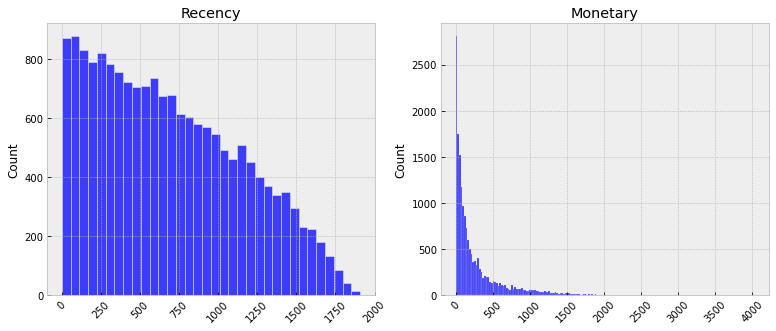

In [115]:
plt.figure(figsize=(20,5))
for i,c in enumerate(df_num):
    plt.subplot(1,3,i+1)
    sns.histplot(df_num[c])
    plt.title(c)
    plt.xlabel('')
    plt.xticks(rotation=45)

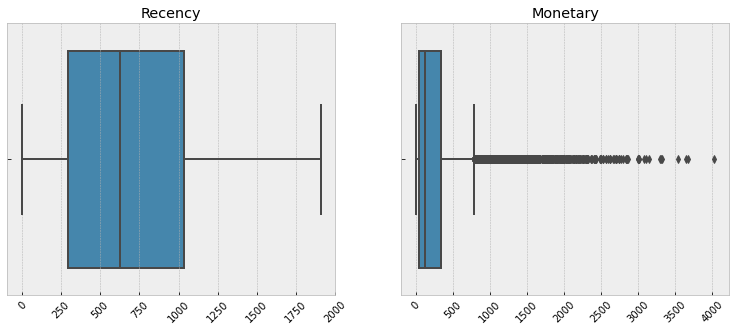

In [116]:
plt.figure(figsize=(20,5))
for i,c in enumerate(df_num):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_num[c])
    plt.title(c)
    plt.xlabel('')
    plt.xticks(rotation=45)

Frequency
1            16042
2             1339
3               77
4                5
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


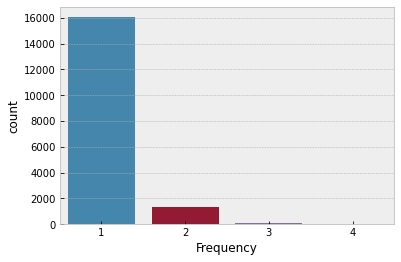

In [117]:
print(df_cat.value_counts())
print(sns.countplot(data=df_cat,x='Frequency'))

### Outlier Handling

In [118]:
# winsorizer
winsorizer = Winsorizer(capping_method='iqr',
                          tail='both', 
                          fold=3,
                          variables=['Monetary'])

winsorizer.fit(df_num)

df_num = winsorizer.transform(df_num)                      

### Scaling

In [119]:
scale = MinMaxScaler()

In [120]:
df_num_scale = scale.fit_transform(df_num)

df_num_fin = pd.DataFrame()
df_num_fin['Recency'] = pd.DataFrame(df_num_scale[:,0])
df_num_fin['Monetary'] = pd.DataFrame(df_num_scale[:,1])

df_num_fin

,Recency,Monetary
0,0.962264,0.198607
1,0.966457,0.001471
2,0.939727,0.478129
3,0.970650,0.036370
4,0.922432,0.007699
...,...,...
17458,0.001572,0.036779
17459,0.003145,0.003801
17460,0.001048,0.007209
17461,0.003145,0.117693


### Concat

In [121]:
df_use = pd.concat([df_RFM['user_id'],df_cat,df_num_fin],axis=1)
df_use

,user_id,Frequency,Recency,Monetary
0,17.0,1,0.962264,0.198607
1,25.0,1,0.966457,0.001471
2,63.0,1,0.939727,0.478129
3,65.0,1,0.970650,0.036370
4,69.0,1,0.922432,0.007699
...,...,...,...,...
17458,295368.0,1,0.001572,0.036779
17459,296332.0,1,0.003145,0.003801
17460,296584.0,1,0.001048,0.007209
17461,296887.0,1,0.003145,0.117693


### PCA

In [122]:
pca = PCA(n_components=2).fit(df_use)

In [123]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.55488269e-11])

In [124]:
df_pca = pca.transform(df_use)

## Modeling

### K means

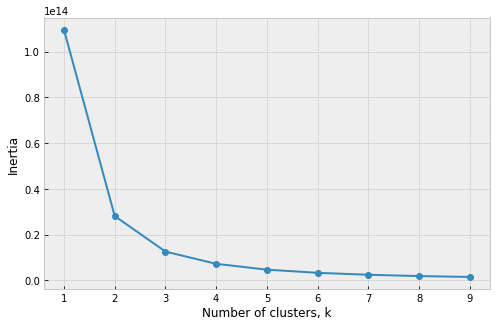

In [125]:
#check the optimal k value with base params (Algo: lloyd)
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k,algorithm='lloyd')
    model.fit(df_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Based on the inertia, the best elbow for this dataset is k = 3

In [126]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=99).fit(df_pca)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [127]:
silhouette_scores = [silhouette_score(df_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

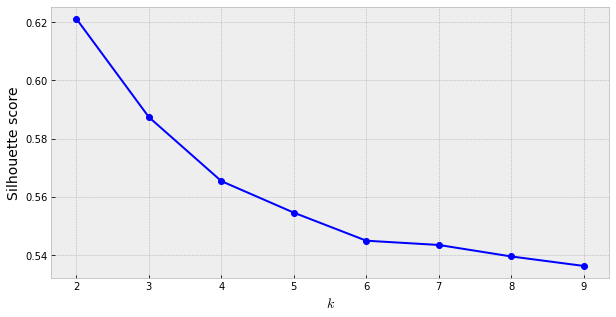

In [128]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

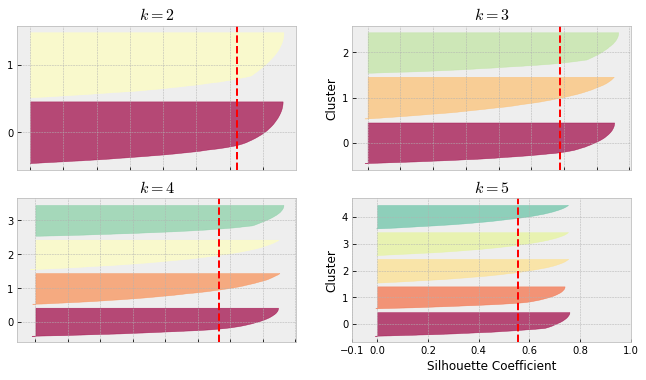

In [129]:
plt.figure(figsize=(11, 9))

for k in (2,3,4,5):
    plt.subplot(3,2,k-1)

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(df_pca, y_pred)

    padding = len(df_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = pl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
        facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
    if k in (5,10):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)

plt.show()

inertia :  12556369512570.646


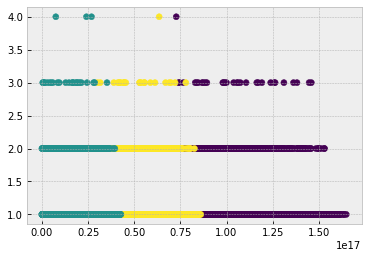

In [131]:
kmeans_lloyd = KMeans(n_clusters=3,algorithm='lloyd',random_state=99)

kmeans_lloyd.fit(df_use)

print('inertia : ', kmeans_lloyd.inertia_)

labels_kmc_lloyd = kmeans_lloyd.labels_
labels_kmc_lloyd

plt.scatter(df_RFM['Recency'],df_RFM['Frequency'],c=labels_kmc_lloyd,cmap='viridis')

inertia :  12556369512570.646


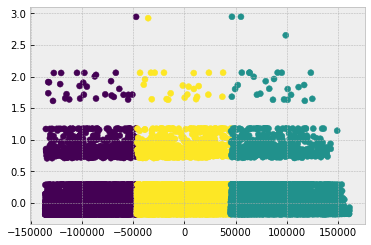

In [132]:
kmeans_elkan = KMeans(n_clusters=3,algorithm='elkan',random_state=99)

kmeans_elkan.fit(df_use)

print('inertia : ', kmeans_elkan.inertia_)

labels_kmc_elkan = kmeans_elkan.labels_
labels_kmc_elkan

plt.scatter(df_pca[:,0],df_pca[:,1],c=labels_kmc_elkan,cmap='viridis')

### TSNE plot

In [133]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df_use) 
    kmeanModel.fit(df_use)     
      
    distortions.append(sum(np.min(cdist(df_use, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_use.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df_use, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df_use.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

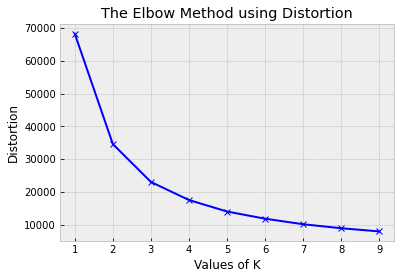

In [134]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

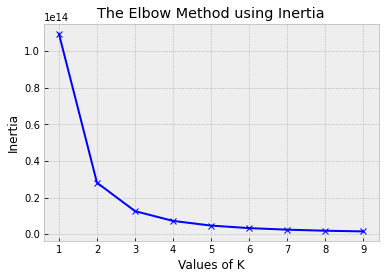

In [135]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [136]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

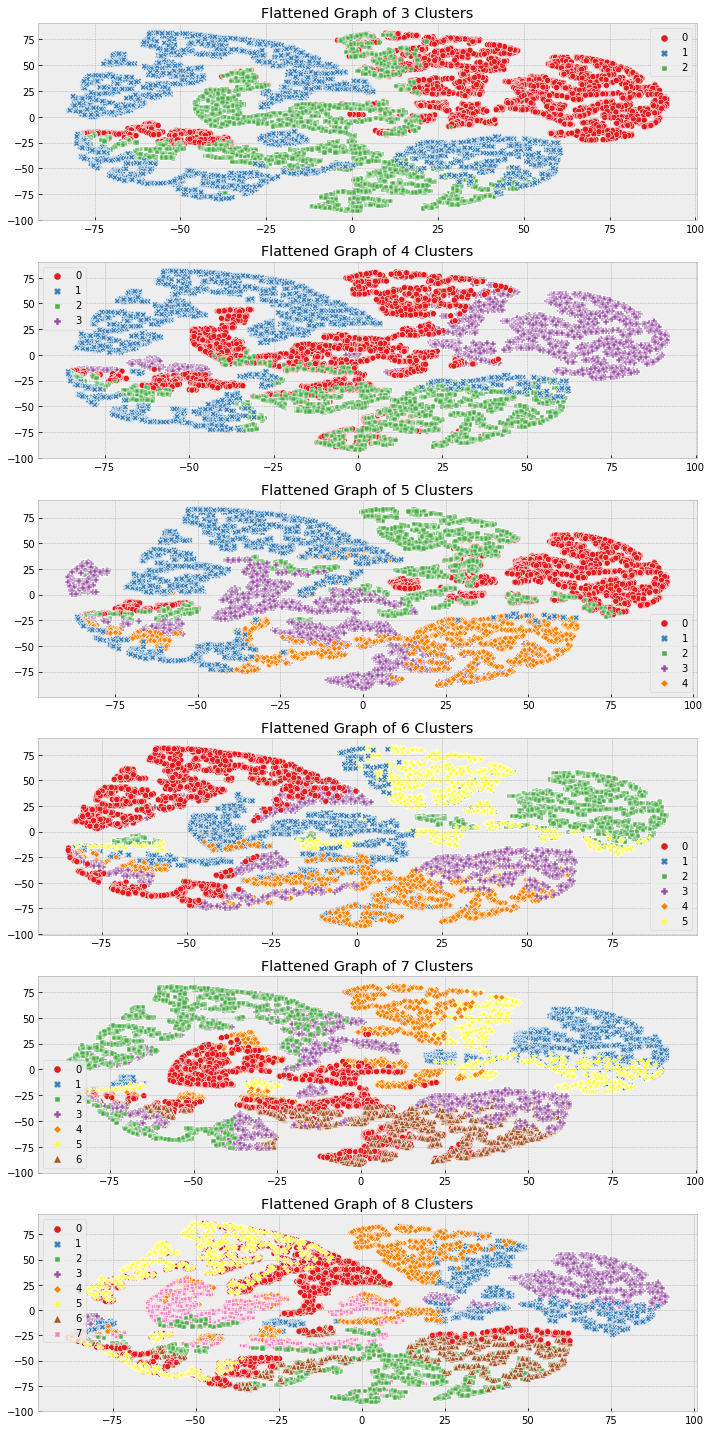

In [137]:
plt.figure(figsize=(10, 20))

plt.subplot(6, 1, 1)
df_rfm_k3 = kmeans(df_use, 3, df_preprocess)

plt.subplot(6, 1, 2)
df_rfm_k4 = kmeans(df_use, 4, df_preprocess)

plt.subplot(6, 1, 3)
df_rfm_k5 = kmeans(df_use, 5, df_preprocess)

plt.subplot(6, 1, 4)
df_rfm_k6 = kmeans(df_use, 6, df_preprocess)

plt.subplot(6, 1, 5)
df_rfm_k7 = kmeans(df_use, 7, df_preprocess)

plt.subplot(6, 1, 6)
df_rfm_k8 = kmeans(df_use, 8, df_preprocess)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

In [138]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_RFM.index, 
                                       columns=df_RFM.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['user_id', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

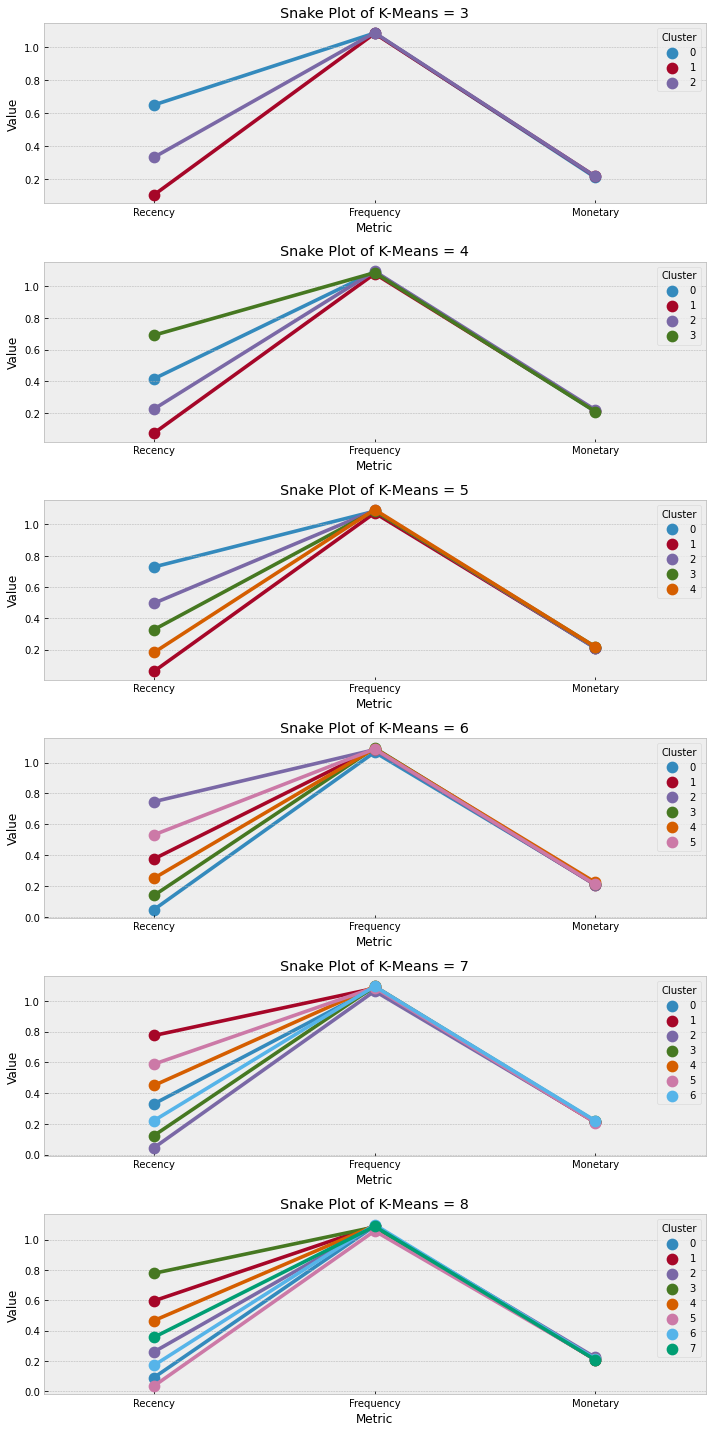

In [139]:
plt.figure(figsize=(10, 20))

plt.subplot(6, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(df_use, df_rfm_k3, df_RFM) 

plt.subplot(6, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(df_use, df_rfm_k4, df_RFM)

plt.subplot(6, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(df_use, df_rfm_k5, df_RFM)

plt.subplot(6, 1, 4)
plt.title('Snake Plot of K-Means = 6')
snake_plot(df_use, df_rfm_k6, df_RFM)

plt.subplot(6, 1, 5)
plt.title('Snake Plot of K-Means = 7')
snake_plot(df_use, df_rfm_k7, df_RFM)

plt.subplot(6, 1, 6)
plt.title('Snake Plot of K-Means = 8')
snake_plot(df_use, df_rfm_k8, df_RFM)

plt.tight_layout()